In [70]:
import numpy as np
import matplotlib.pyplot as plt
import squidpy as sq
import pandas as pd
import os
from PIL import Image
import imagecodecs
import tifffile as tff
from pyometiff import OMETIFFReader
import seaborn as sns

In [71]:
data_dir="/Volumes/T7/Plaque_Xenium_data"

panel_dir=[f for f in os.listdir(data_dir) if ('Panel' in f and '._' not in f)]

for panel in panel_dir[0:1]:
    panel_dir=os.path.join(data_dir,panel)
 
    ## Loop over all samples in a batch
    for sample_name in os.listdir(panel_dir)[0:]:
        sample_dir=os.path.join(data_dir,panel,sample_name)
        #print(sample_name)
        if os.path.isdir(sample_dir):
            print(sample_dir)


/Volumes/T7/Plaque_Xenium_data/20230808__140639__2311-01_Sachs_Panel1/output-XETG00050__0003496__P2_D__20230808__140759
/Volumes/T7/Plaque_Xenium_data/20230808__140639__2311-01_Sachs_Panel1/output-XETG00050__0003370__P3_D__20230808__140759
/Volumes/T7/Plaque_Xenium_data/20230808__140639__2311-01_Sachs_Panel1/output-XETG00050__0003496__P1_D__20230808__140759
/Volumes/T7/Plaque_Xenium_data/20230808__140639__2311-01_Sachs_Panel1/output-XETG00050__0003370__P4_D__20230808__140759
/Volumes/T7/Plaque_Xenium_data/20230808__140639__2311-01_Sachs_Panel1/output-XETG00050__0003370__P4_H__20230808__140759
/Volumes/T7/Plaque_Xenium_data/20230808__140639__2311-01_Sachs_Panel1/output-XETG00050__0003496__P2_H__20230808__140759
/Volumes/T7/Plaque_Xenium_data/20230808__140639__2311-01_Sachs_Panel1/output-XETG00050__0003370__P3_H__20230808__140759
/Volumes/T7/Plaque_Xenium_data/20230808__140639__2311-01_Sachs_Panel1/output-XETG00050__0003496__P1_H__20230808__140759


In [74]:
sample_dir="/Volumes/T7/Plaque_Xenium_data/20230808__140639__2311-01_Sachs_Panel1/output-XETG00050__0003370__P3_D__20230808__140759"
fn=os.path.join(sample_dir,'morphology.ome.tif')
reader = OMETIFFReader(fpath=fn)
img_array, metadata, xml_metadata = reader.read()

KeyboardInterrupt: 

In [66]:
#fn=os.path.join(sample_dir,'nucleus_boundaries.csv.gz')
nucleus_bound=pd.read_csv(os.path.join(sample_dir,'nucleus_boundaries.csv.gz'))

In [47]:
img_array_pos=img_array[img_array>0]

(0.0, 10000000.0)

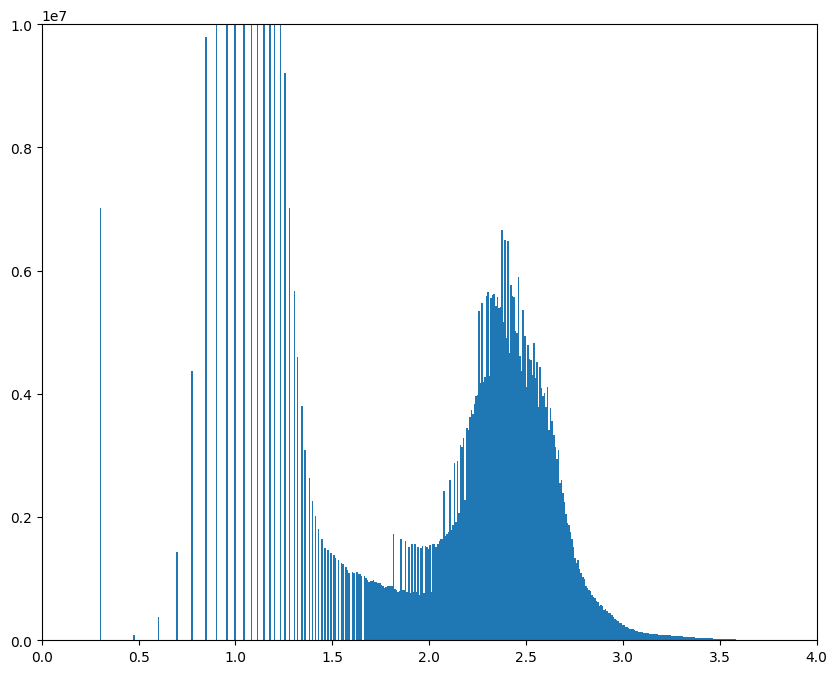

In [68]:
fig,ax=plt.subplots(1,1,figsize=(10,8))
ax.hist(np.log10(img_array_pos),bins=500)
ax.set_xlim(0,4)
#plt.yscale('log')
#plt.xscale('log')
ax.set_ylim(0,10e6)

In [ ]:
mask=np.log10(img_array_pos)>4

plt.subplot(1,1,1)
fig,ax=plt.subplots(1,1,figsize=(20,15))
img=ax.imshow(img_array[img_array>10**1.9],cmap='Greys')
plt.colorbar(img, ax=ax)
plt.show()


/var/folders/0_/_m74rlq93855zphvhkg3qkhh19_hwl/T/ipykernel_81146/3956674579.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('Greys')


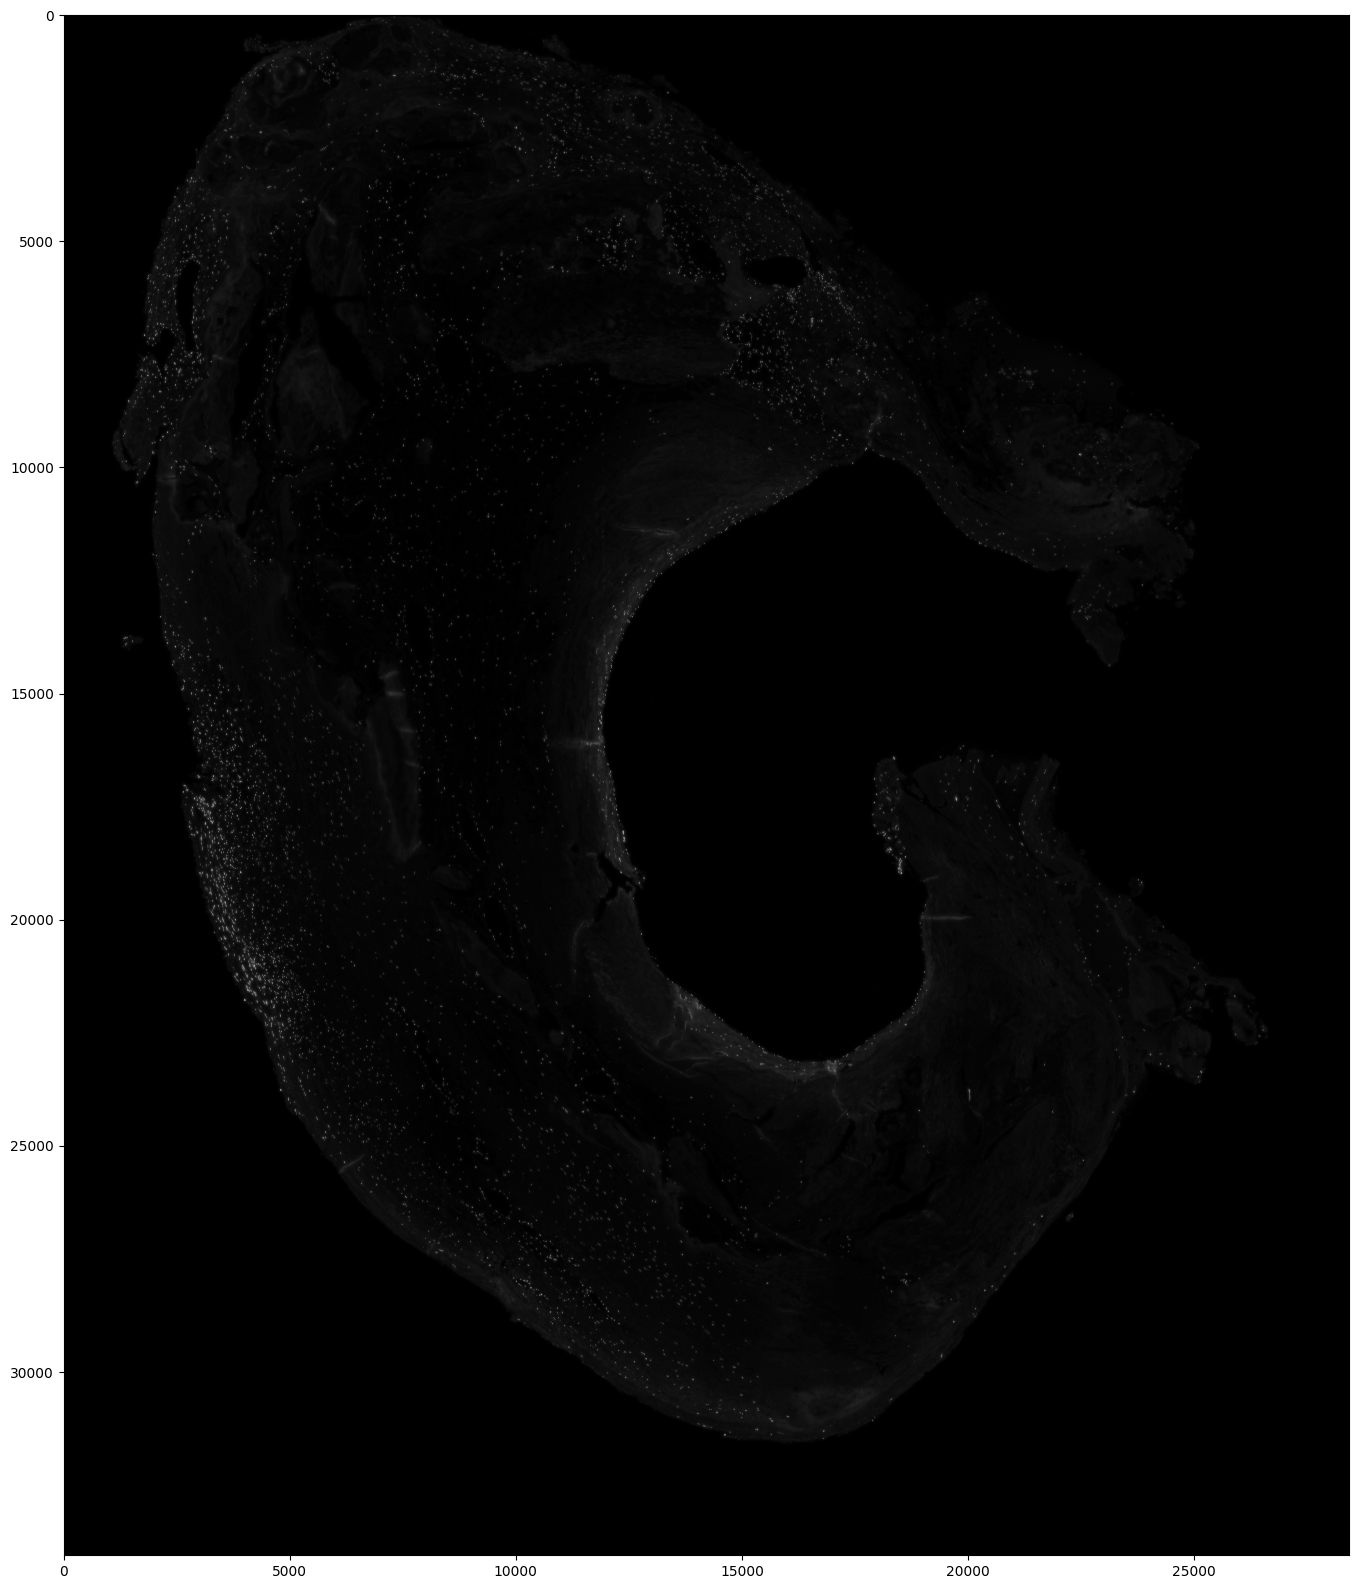

In [49]:
fig,ax=plt.subplots(1,1,figsize=(20,20))
orig_map=plt.cm.get_cmap('Greys') 
reversed_map = orig_map.reversed() 
ax.imshow(img_array,cmap=reversed_map)
plt.colorbar(img, ax=ax)
plt.show()

/var/folders/0_/_m74rlq93855zphvhkg3qkhh19_hwl/T/ipykernel_81146/1510069666.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('Greys')


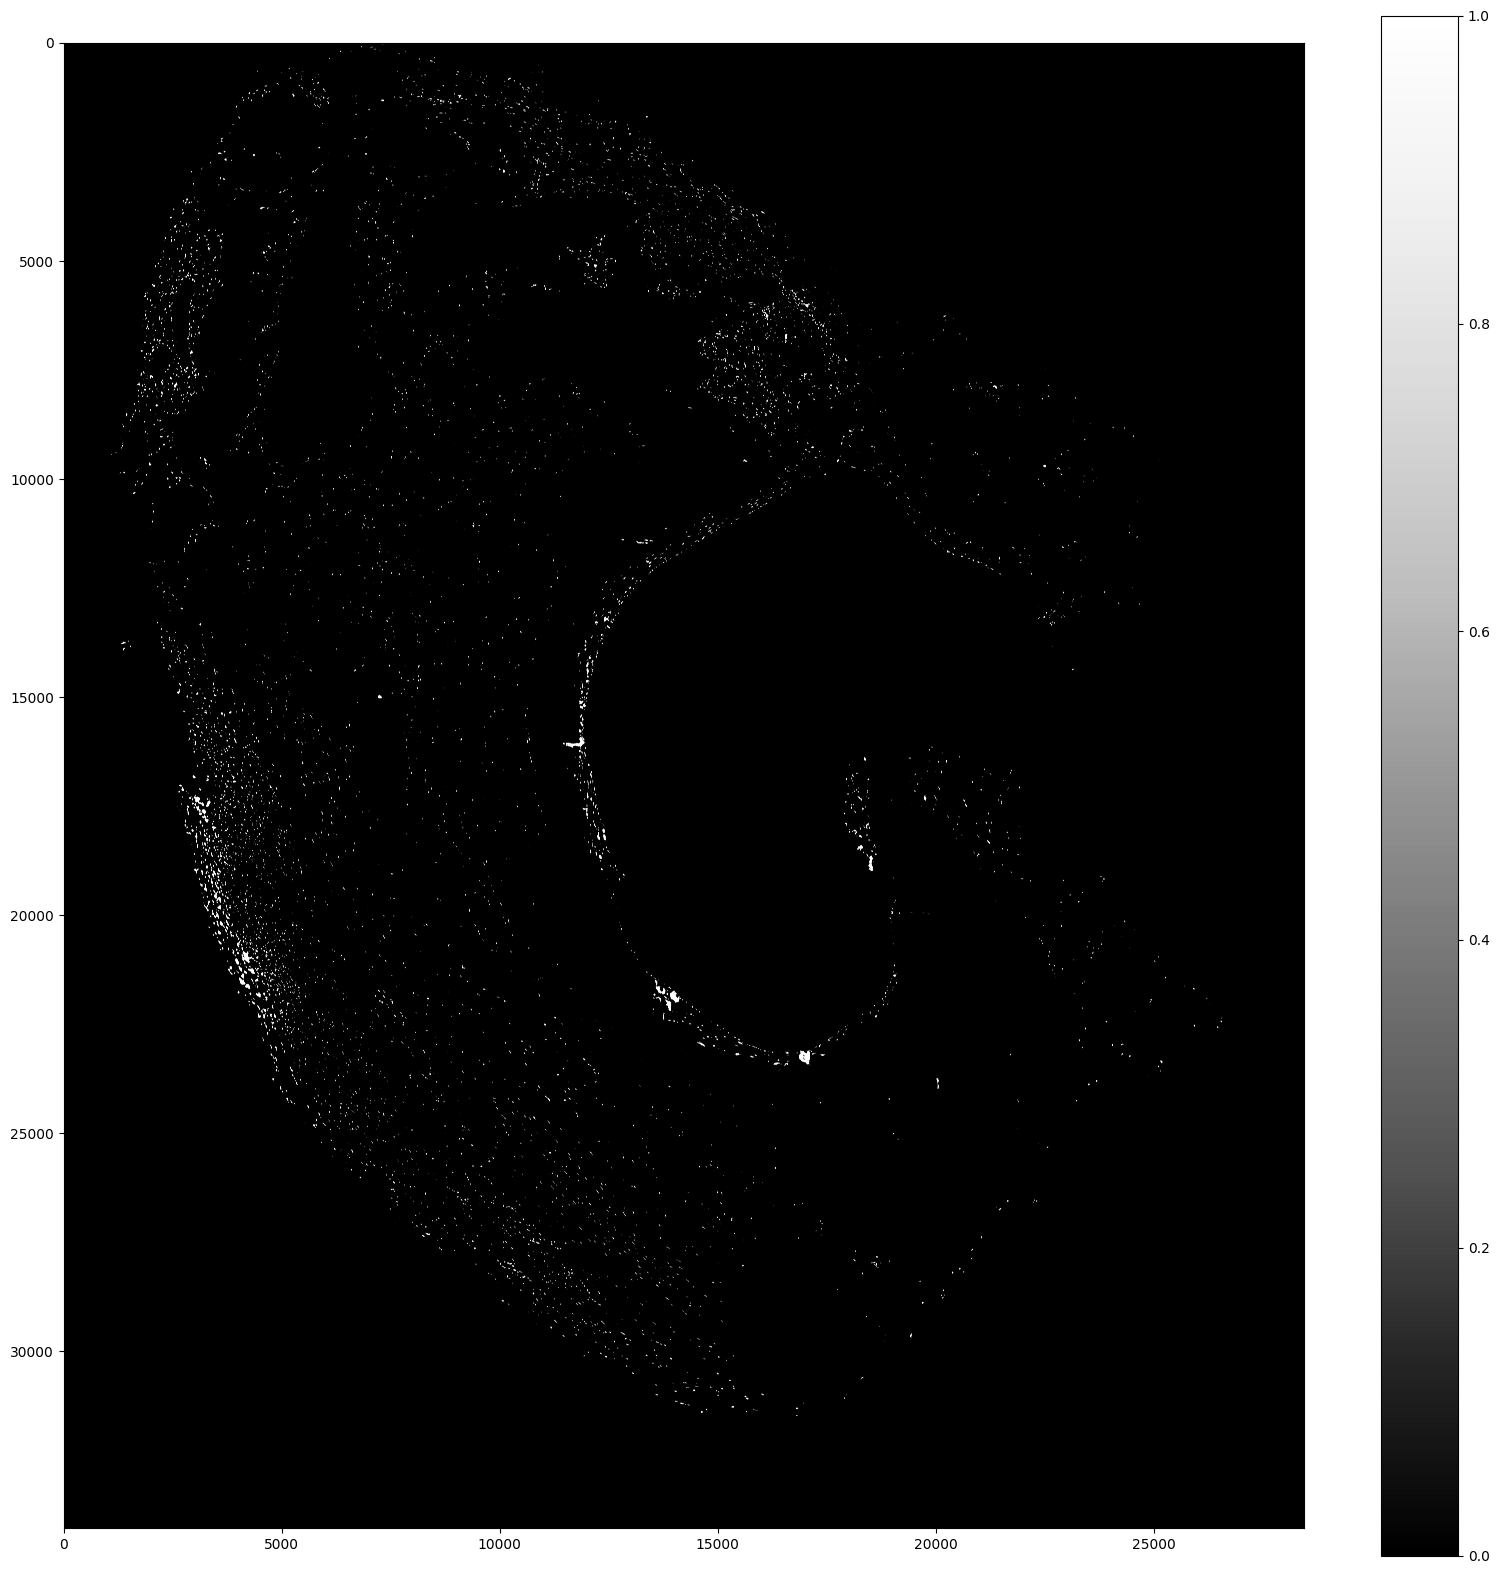

In [60]:
img_array_=np.copy(img_array)
thr=10**3.1
img_array_[img_array_<thr]=0
img_array_[img_array_>=thr]=1


fig,ax=plt.subplots(1,1,figsize=(20,20))
orig_map=plt.cm.get_cmap('Greys') 
reversed_map = orig_map.reversed() 
img=ax.imshow(img_array_,cmap=reversed_map)
plt.colorbar(img, ax=ax)
plt.show()